# 규제

### 데이터 불러오기

In [28]:
import pandas as pd
from sklearn.datasets import load_boston

In [29]:
datasets = load_boston()
datasets.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [30]:
boston_df = pd.DataFrame(datasets.data, columns = datasets.feature_names)
boston_df['PRICE'] = datasets.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
boston_df.shape

(506, 14)

### 학습용/테스트용 데이터 나누기

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x = boston_df.iloc[:, :-1]
y = boston_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 156)

In [34]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

## 릿지 회귀

In [35]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [38]:
# 릿지 회귀 
ridge = Ridge(alpha = 10)

# 교차 검증
neg_mse_scores = cross_val_score(ridge, x, y, 
                                 scoring = 'neg_mean_squared_error',
                                 cv = 5,
                                 verbose = 1)

# 평가 결과
avg_mse = -1 * np.mean(neg_mse_scores)
avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

print(neg_mse_scores)
print(np.sqrt(-1 * neg_mse_scores))
print(avg_mse)
print(avg_rmse)

[-11.4217962  -24.29446706 -28.14355069 -74.59916618 -28.51714218]
[3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ]
33.395224459036655
5.518166280868977


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


### alpha 파라미터 튜닝

In [41]:
# alpha 파라미터 튜닝

alphas = [0, 0.1, 1, 10, 100, 150, 200]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    scores = cross_val_score(ridge, x, y,
                             scoring = 'neg_mean_squared_error',
                             cv = 5)
    avg_mse = np.mean(-1 * scores)
    avg_rmse = np.mean(np.sqrt(-1 * scores))
    print(f'## alpha값이 {alpha}일 때, \n\t mse: {avg_mse:.3f}, rmse: {avg_rmse:.3f}')

## alpha값이 0일 때, 
	 mse: 37.132, rmse: 5.829
## alpha값이 0.1일 때, 
	 mse: 36.707, rmse: 5.788
## alpha값이 1일 때, 
	 mse: 35.267, rmse: 5.653
## alpha값이 10일 때, 
	 mse: 33.395, rmse: 5.518
## alpha값이 100일 때, 
	 mse: 29.906, rmse: 5.330
## alpha값이 150일 때, 
	 mse: 29.754, rmse: 5.328
## alpha값이 200일 때, 
	 mse: 29.829, rmse: 5.341


### 시각화

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

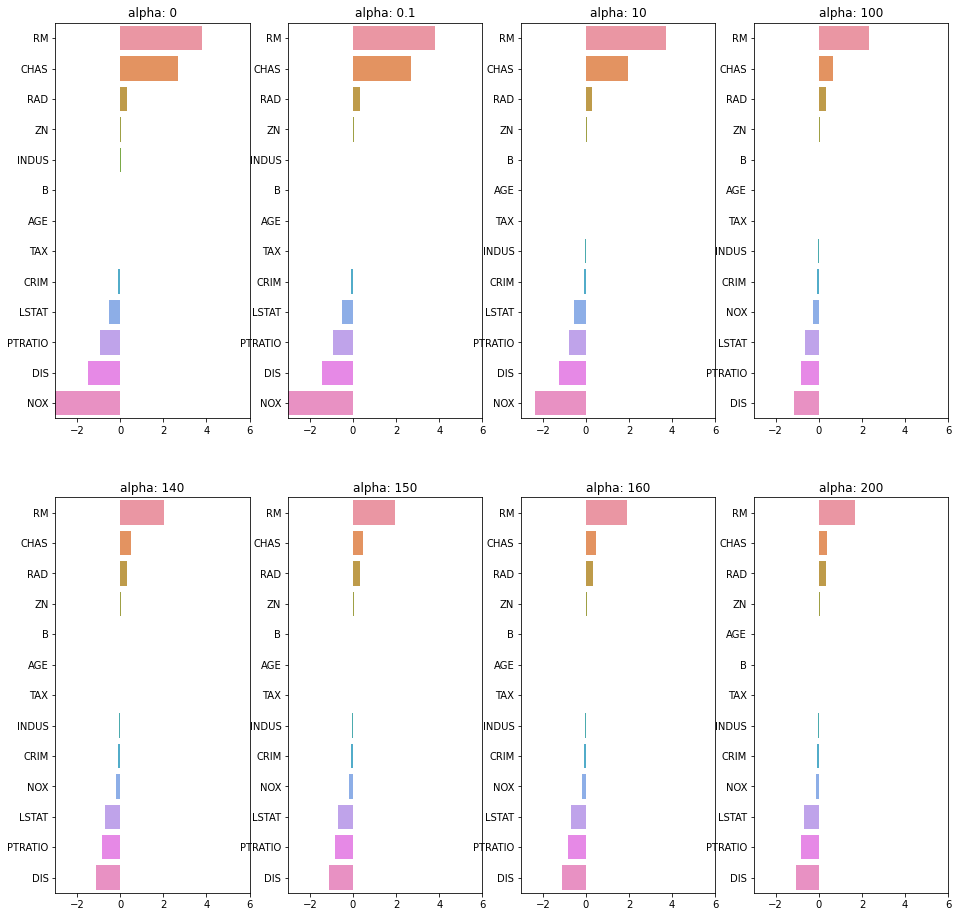

In [69]:
# 릿지회귀의 alpha 규제값에 따라 회귀계수의 값 변동 시각화

plt.figure(figsize = (16, 16))

alphas = [0, 0.1, 10, 100, 140, 150, 160, 200]

coeff_df = pd.DataFrame()

for i, alpha in enumerate(alphas):
    # 모델링
    ridge = Ridge(alpha = alpha)
    
    # 학습
    ridge.fit(x, y)
    
    # 학습결과에 따른 회귀계수 산출
    coeff = pd.Series(ridge.coef_, index = x.columns)
    col_name = f'alpha: {alpha}'
    coeff_df[col_name] = coeff
    
    # 시각화
    ax = plt.subplot(2, 4, i+1)
    coeff = coeff.sort_values(ascending = False)
    sns.barplot(x = coeff.values, y = coeff.index, ax = ax)
    ax.set_title(col_name)
    ax.set_xlim(-3,6)

plt.show()

In [70]:
coeff_df

,alpha: 0,alpha: 0.1,alpha: 10,alpha: 100,alpha: 140,alpha: 150,alpha: 160,alpha: 200
CRIM,-0.108011,-0.107474,-0.101435,-0.102202,-0.101746,-0.101606,-0.101460,-0.100830
ZN,0.046420,0.046572,0.049579,0.054496,0.055141,0.055245,0.055331,0.055547
INDUS,0.020559,0.015999,-0.042962,-0.052826,-0.052864,-0.052757,-0.052617,-0.051809
CHAS,2.686734,2.670019,1.952021,0.638335,0.497970,0.472453,0.449568,0.377547
NOX,-17.766611,-16.684645,-2.371619,-0.262847,-0.184837,-0.171709,-0.160192,-0.125480
RM,3.809865,3.818233,3.702272,2.334536,2.011860,1.945427,1.883520,1.672973
AGE,0.000692,-0.000269,-0.010707,0.001212,0.004884,0.005691,0.006462,0.009233
DIS,-1.475567,-1.459626,-1.248808,-1.153390,-1.113889,-1.104071,-1.094317,-1.056182
RAD,0.306049,0.303515,0.279596,0.315358,0.322111,0.323369,0.324492,0.327895
TAX,-0.012335,-0.012421,-0.013993,-0.015856,-0.016156,-0.016214,-0.016267,-0.016437


- alpha 값을 증가시킬수록, 회귀계수의 절댓값은 점점 작아짐
- NOX 피처의 경우가 대표적임
- 회귀계수 값을 점점 작아지게하지만 0에 수렴하게 하진 않음

## 라쏘 회귀

In [83]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

### alpha 파라미터 튜닝

In [114]:
alphas = [0, 0.1, 0.2, 0.5, 0.7, 1, 2, 5]

for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    scores = cross_val_score(lasso, x, y, 
                             scoring = 'neg_mean_squared_error',
                             cv = 5)
    mse = np.mean(-1 * scores)
    rmse = np.mean(np.sqrt(-1 * scores))
    print(f'## alpha값이 {alpha}일 때, \n\t mse: {avg_mse:.3f}, rmse: {avg_rmse:.3f}')

## alpha값이 0일 때, 
	 mse: 29.829, rmse: 5.341
## alpha값이 0.1일 때, 
	 mse: 29.829, rmse: 5.341
## alpha값이 0.2일 때, 
	 mse: 29.829, rmse: 5.341
## alpha값이 0.5일 때, 
	 mse: 29.829, rmse: 5.341
## alpha값이 0.7일 때, 
	 mse: 29.829, rmse: 5.341
## alpha값이 1일 때, 
	 mse: 29.829, rmse: 5.341
## alpha값이 2일 때, 
	 mse: 29.829, rmse: 5.341
## alpha값이 5일 때, 
	 mse: 29.829, rmse: 5.341


### 시각화

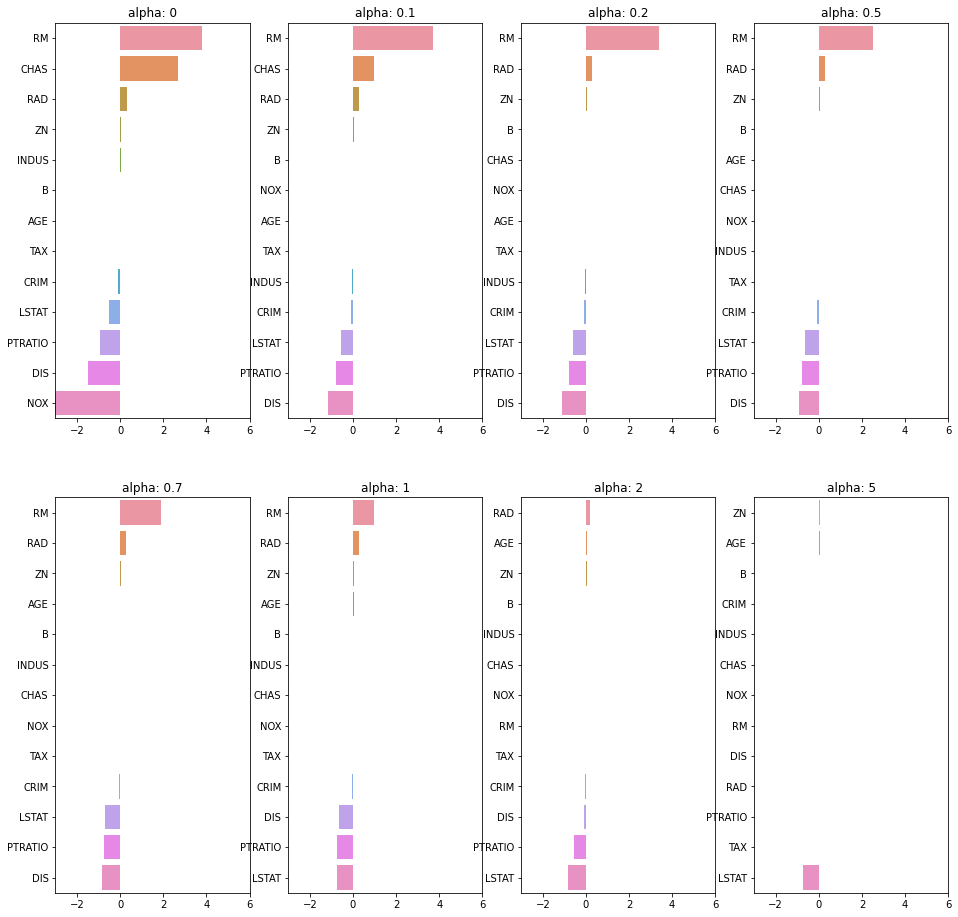

In [86]:
# 라쏘회귀의 alpha 규제값에 따라 회귀계수의 값 변동 시각화

plt.figure(figsize = (16, 16))

alphas = [0, 0.1, 0.2, 0.5, 0.7, 1, 2, 5]

coeff_df = pd.DataFrame()

for i, alpha in enumerate(alphas):
    # 모델링
    lasso = Lasso(alpha = alpha)
    
    # 학습
    lasso.fit(x, y)
    
    # 학습결과에 따른 회귀계수 산출
    coeff = pd.Series(lasso.coef_, index = x.columns)
    col_name = f'alpha: {alpha}'
    coeff_df[col_name] = coeff
    
    # 시각화
    ax = plt.subplot(2, 4, i+1)
    coeff = coeff.sort_values(ascending = False)
    sns.barplot(x = coeff.values, y = coeff.index, ax = ax)
    ax.set_title(col_name)
    ax.set_xlim(-3,6)

plt.show()

In [87]:
coeff_df

,alpha: 0,alpha: 0.1,alpha: 0.2,alpha: 0.5,alpha: 0.7,alpha: 1,alpha: 2,alpha: 5
CRIM,-0.108011,-0.097894,-0.095627,-0.083289,-0.075242,-0.063437,-0.021503,-0.000000
ZN,0.046420,0.049211,0.049581,0.049544,0.049480,0.049165,0.035525,0.038467
INDUS,0.020559,-0.036619,-0.023406,-0.005253,-0.000000,-0.000000,-0.000000,-0.000000
CHAS,2.686734,0.955190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NOX,-17.766611,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.809865,3.703202,3.406007,2.498212,1.881473,0.949811,0.000000,0.000000
AGE,0.000692,-0.010037,-0.005062,0.003604,0.010470,0.020910,0.043563,0.031679
DIS,-1.475567,-1.160538,-1.103303,-0.936605,-0.826273,-0.668790,-0.067749,-0.000000
RAD,0.306049,0.274707,0.281748,0.277451,0.273007,0.264206,0.173168,0.000000
TAX,-0.012335,-0.014570,-0.015171,-0.015442,-0.015444,-0.015212,-0.011668,-0.007669


- 바플롯을 보면 alpha값이 커질 수록, 피처들이 사라지는 것이 보이고, 그래프를 보면 점차 중요도가 낮은 피처들의 회귀계수가 0으로 수렴한 것을 볼 수 있음 

## 엘라스틱넷
- L2규제와 L1 규제 결합한 것
- ElasticNet()의 인자는 alpha, l1_ratio로 구성되어 있음
    - alpha = l1_alpha + l2_alpha
    - l1_ratio = l1_alpha/(l1_alpha + l2_alpha)


In [88]:
from sklearn.linear_model import ElasticNet

In [91]:
alphas = [0, 0.1, 0.2, 0.5, 0.7, 1, 2, 5]
l1_ratios = [0.3, 0.5, 0.7, 0.9]

for alpha in alphas:
    print(f'#### alpha: {alpha}')
    for l1_ratio in l1_ratios:
        elastic = ElasticNet(alpha = alpha, l1_ratio = l1_ratio)
        scores = cross_val_score(elastic, x, y, 
                                 scoring = 'neg_mean_squared_error',
                                 cv = 5)
        rmse = np.mean(np.sqrt(-1 * scores))
        print(f'\t l1_ratio: {l1_ratio}, \n\t\t rmse: {rmse:.3f}')

#### alpha: 0
	 l1_ratio: 0.3, 
		 rmse: 5.829
	 l1_ratio: 0.5, 
		 rmse: 5.829
	 l1_ratio: 0.7, 
		 rmse: 5.829
	 l1_ratio: 0.9, 
		 rmse: 5.829
#### alpha: 0.1
	 l1_ratio: 0.3, 
		 rmse: 5.439
	 l1_ratio: 0.5, 
		 rmse: 5.478
	 l1_ratio: 0.7, 
		 rmse: 5.526
	 l1_ratio: 0.9, 
		 rmse: 5.580
#### alpha: 0.2
	 l1_ratio: 0.3, 
		 rmse: 5.385
	 l1_ratio: 0.5, 
		 rmse: 5.428
	 l1_ratio: 0.7, 
		 rmse: 5.490
	 l1_ratio: 0.9, 
		 rmse: 5.571
#### alpha: 0.5
	 l1_ratio: 0.3, 
		 rmse: 5.380
	 l1_ratio: 0.5, 
		 rmse: 5.413
	 l1_ratio: 0.7, 
		 rmse: 5.467
	 l1_ratio: 0.9, 
		 rmse: 5.574
#### alpha: 0.7
	 l1_ratio: 0.3, 
		 rmse: 5.411
	 l1_ratio: 0.5, 
		 rmse: 5.448
	 l1_ratio: 0.7, 
		 rmse: 5.507
	 l1_ratio: 0.9, 
		 rmse: 5.624
#### alpha: 1
	 l1_ratio: 0.3, 
		 rmse: 5.470
	 l1_ratio: 0.5, 
		 rmse: 5.522
	 l1_ratio: 0.7, 
		 rmse: 5.597
	 l1_ratio: 0.9, 
		 rmse: 5.684
#### alpha: 2
	 l1_ratio: 0.3, 
		 rmse: 5.659
	 l1_ratio: 0.5, 
		 rmse: 5.753
	 l1_ratio: 0.7, 
		 rmse: 5.863
	 l

In [92]:
from sklearn.model_selection import GridSearchCV

In [95]:
param = {'alpha': alphas ,
         'l1_ratio': l1_ratios}

elastic = ElasticNet()

grid_clf = GridSearchCV(elastic,
                        param_grid = param,
                        scoring = 'neg_root_mean_squared_error',
                        cv = 5)
grid_clf.fit(x, y)

best_params = grid_clf.best_params_
best_scores = grid_clf.best_score_

print(best_params)
print(-1 * best_scores)

{'alpha': 0.5, 'l1_ratio': 0.3}
5.379940495780719


In [110]:
pd.DataFrame(grid_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022998,0.006900,0.003800,0.000750,0,0.3,"{'alpha': 0, 'l1_ratio': 0.3}",-3.529915,-5.103785,-5.751012,-8.986789,-5.771794,-5.828659,1.777229,23
1,0.024799,0.004662,0.005203,0.002041,0,0.5,"{'alpha': 0, 'l1_ratio': 0.5}",-3.529915,-5.103785,-5.751012,-8.986789,-5.771794,-5.828659,1.777229,23
2,0.023599,0.007002,0.005402,0.001957,0,0.7,"{'alpha': 0, 'l1_ratio': 0.7}",-3.529915,-5.103785,-5.751012,-8.986789,-5.771794,-5.828659,1.777229,23
3,0.017800,0.003187,0.007001,0.004095,0,0.9,"{'alpha': 0, 'l1_ratio': 0.9}",-3.529915,-5.103785,-5.751012,-8.986789,-5.771794,-5.828659,1.777229,23
4,0.006600,0.002244,0.004002,0.000633,0.1,0.3,"{'alpha': 0.1, 'l1_ratio': 0.3}",-3.438847,-5.027546,-5.529160,-8.114869,-5.083470,-5.438779,1.514246,6
5,0.007800,0.001164,0.003806,0.000405,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-3.417120,-5.005330,-5.504916,-8.302294,-5.162288,-5.478389,1.584151,10
6,0.009393,0.004212,0.003802,0.000979,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-3.391780,-4.977266,-5.477066,-8.523234,-5.260296,-5.525928,1.668077,14
7,0.014399,0.006619,0.007803,0.004110,0.1,0.9,"{'alpha': 0.1, 'l1_ratio': 0.9}",-3.364717,-4.948136,-5.443572,-8.759875,-5.384205,-5.580101,1.759277,17
8,0.010002,0.004688,0.003799,0.000399,0.2,0.3,"{'alpha': 0.2, 'l1_ratio': 0.3}",-3.517555,-5.140233,-5.790383,-7.630080,-4.845282,-5.384707,1.344863,2
9,0.022399,0.014052,0.006401,0.001855,0.2,0.5,"{'alpha': 0.2, 'l1_ratio': 0.5}",-3.490101,-5.102998,-5.780592,-7.831013,-4.933377,-5.427616,1.414533,5


<AxesSubplot:>

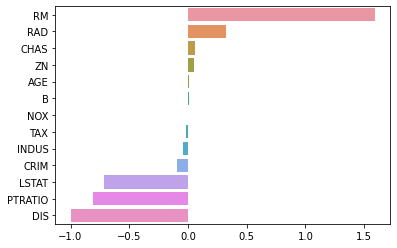

In [107]:
elastic_best = ElasticNet(l1_ratio = best_params['l1_ratio'], alpha = best_params['alpha'])

elastic_best.fit(x, y)
coeff = pd.Series(elastic_best.coef_, index = x.columns)
coeff.sort_values(ascending = False, inplace = True)

sns.barplot(x = coeff.values, y = coeff.index)